In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

## 1st order model system, continous time 

Stable 1st order models are a class of differential equations that model numerous real world systems. These can be compactly expressed in transfer function notation.

The following is the common notation a transfer function $H(s)$ where $Y$ denotes the system output, $X$ denotes the system input, and $s$ denotes a continous time derivative.  

$$ H(s) = \frac{Y(s)}{X(s)} $$

Here is the transfer function of a first order system characterized by $a$ which is the steady state(DC) gain and where $\tau$ is the time constant.

$$ H(s) = \frac{a}{\tau \cdot s +  1}, \quad or \quad  y = a \cdot x - \tau \cdot y' $$

The time constant $\tau$ in circuits is also called the RC time constant and it reflects the amount of time the system will take to reach $1 - e^{-1}$ or ~63.21 %. 

Example system: 

$$ H(s) = \frac{2}{5 \cdot s + 1} $$



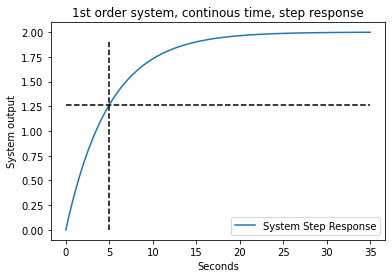

In [92]:
tau = 5 # time constant 
a = 2 # steady state gain  
num = [a] # transfer function numerator
den = [tau, 1] # transfer function denominator 
sys = signal.TransferFunction(num, den)

# using scipy's signal library, calculate step response 
time, response = signal.step(sys)

plt.plot(time,response) # Draw system response 
plt.plot(time,response*0 + a*(1 - np.e**(-1)), 'k--') # draw horizontal line at ~63% of a
plt.plot(np.arange(0,a,0.1)*0+tau,np.arange(0,a,0.1),'k--') # draw veritical line @ at tau
plt.legend(['System Step Response'])
plt.xlabel('Seconds')
plt.ylabel('System output')
plt.title('1st order system, continous time, step response')
plt.show()

As observed above, the steady state value of the system is 2 and at 5 seconds, the system's output is ~2*(0.63). Hence this is how values $a,\tau $ can be used to characterize a first order system. While the above code may have appeared simple, the line featuring  `signal.step(sys)` would equate to many 100s if not 1000s of lines of code to be able to simulate a continous time transfer function. To be able to simulate systems without 'cheating' or using rather advance algorithms, discrete time implementations can simplify the task. 

## Discrete time 1st order model / Ztransform

Often systems are implemented in discrete time. A continous time derivative can be approximated in many ways. The following is one such approximation 

$$ s \approx \frac{1 - z^{-1}}{\Delta T}, \quad \quad s\cdot x \approx \frac{x(k) - x(k-1)}{\Delta T}  $$

Subsituting this approximation back into the first order transfer function yields the following:

$$ H(z) = \frac{a}{\tau \cdot \frac{1 - z^{-1}}{\Delta T} +  1} $$

$$ H(z) = \frac{\Delta T \cdot a}{ \tau \cdot (1 - z^{-1}) + \Delta T } $$



$$ y(k) \cdot (\tau + \Delta T) - \tau \cdot y(k-1) = \Delta T \cdot a \cdot x(k) $$

$$ y(k) = \frac{\Delta T \cdot a}{\tau + \Delta T} x(k) + \frac{\tau}{\tau + \Delta T} y(k - 1) $$

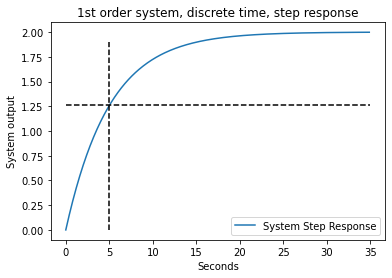

In [91]:
dt = 0.1 # Delta T, the discrete timestep 
dtime = np.arange(0,35,dt) # 35 is roughly where the prior plot ended
y = dtime * 0 # zero-out output
x = 1 # step input 
for i in range(1,len(y)):
    y[i] = dt*a/(tau + dt)*x + tau/(tau+dt)*y[i-1] # calculate system output

plt.plot(dtime,y) # Draw system response
plt.plot(time,response*0 + a*(1 - np.e**(-1)), 'k--') # draw horizontal line at ~63% of a
plt.plot(np.arange(0,a,0.1)*0+tau,np.arange(0,a,0.1),'k--') # draw veritical line @ at tau
plt.legend(['System Step Response'])
plt.xlabel('Seconds')
plt.ylabel('System output')
plt.title('1st order system, discrete time, step response')
plt.show()

As observed above, the steady state value of the system is 2 and at 5 seconds, the system's output is ~2*(0.63). This demonstrates a discrete approximate representation of the system using the same parameters as continous time. Note, this discrete representation is powerful for it is trivial to calculate as well as to simulate with an arbitrary input as shown below

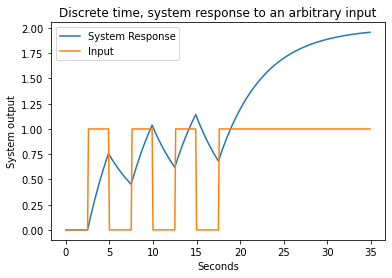

In [93]:
x = dtime * 0 # make input an array of 0s

for i in range(1,len(y)):
    x[i] = (int)((i % 50 > 25) | (i>=200))  # Arbitrary input 
    y[i] = dt*a/(tau + dt)*x[i] + tau/(tau+dt)*y[i-1] # System response  

plt.plot(dtime,y) # Draw system response
plt.plot(dtime,x) # Draw input
plt.legend(['System Response', 'Input'])
plt.xlabel('Seconds')
plt.ylabel('System output')
plt.title('Discrete time, system response to an arbitrary input')
plt.show()